<a href="https://www.kaggle.com/code/risakashiwabara/eda-seaborn-heatmap-matplotlib-ber?scriptVersionId=155382895" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Sample data acquisition</p>

In [2]:
data_bedtime = pd.read_csv('/kaggle/input/japanquality-of-sleep/sleepingtime.csv')
data_bedtime

,sex,time,terms,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other
0,woman,Before 9:00 p.m.,Carbonated drinks,18,90,95,155,5
1,woman,9:00 p.m.-9:29 p.m.,Carbonated drinks,101,440,465,529,23
2,woman,9:30 p.m. to 9:59 p.m.,Carbonated drinks,187,702,645,700,32
3,woman,10:00 p.m. to 10:29 p.m.,Carbonated drinks,302,1006,763,815,42
4,woman,10:30 p.m. to 10:59 p.m.,Carbonated drinks,221,624,458,487,25
...,...,...,...,...,...,...,...,...
115,woman,11:00 p.m.-11:29 p.m.,sweets,540,382,67,26,9
116,woman,11:30 p.m. to 11:59 p.m.,sweets,195,153,28,7,2
117,woman,After midnight,sweets,88,65,19,5,3
118,woman,No set bedtime.,sweets,122,88,14,5,1


In [3]:
df = data_bedtime.assign(total  = data_bedtime[['Eat well Drink well','Sometimes eat Sometimes drink','Hardly eat or drink','Not eating or drinking at all','Other']].sum(axis=1))
df

,sex,time,terms,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other,total
0,woman,Before 9:00 p.m.,Carbonated drinks,18,90,95,155,5,363
1,woman,9:00 p.m.-9:29 p.m.,Carbonated drinks,101,440,465,529,23,1558
2,woman,9:30 p.m. to 9:59 p.m.,Carbonated drinks,187,702,645,700,32,2266
3,woman,10:00 p.m. to 10:29 p.m.,Carbonated drinks,302,1006,763,815,42,2928
4,woman,10:30 p.m. to 10:59 p.m.,Carbonated drinks,221,624,458,487,25,1815
...,...,...,...,...,...,...,...,...,...
115,woman,11:00 p.m.-11:29 p.m.,sweets,540,382,67,26,9,1024
116,woman,11:30 p.m. to 11:59 p.m.,sweets,195,153,28,7,2,385
117,woman,After midnight,sweets,88,65,19,5,3,180
118,woman,No set bedtime.,sweets,122,88,14,5,1,230


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> -Details-</p>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   sex                            120 non-null    object
 1   time                           120 non-null    object
 2   terms                          120 non-null    object
 3   Eat well Drink well            120 non-null    int64 
 4   Sometimes eat Sometimes drink  120 non-null    int64 
 5   Hardly eat or drink            120 non-null    int64 
 6   Not eating or drinking at all  120 non-null    int64 
 7   Other                          120 non-null    int64 
 8   total                          120 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 8.6+ KB


In [5]:
df.columns

Index(['sex', 'time', 'terms', 'Eat well Drink well',
       'Sometimes eat Sometimes drink', 'Hardly eat or drink',
       'Not eating or drinking at all', 'Other', 'total'],
      dtype='object')

In [6]:
df.describe()

,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other,total
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,284.700000,428.625000,222.133333,157.550000,20.891667,1113.900000
std,326.273577,425.859212,233.002107,214.310497,24.362389,1024.974764
min,4.000000,7.000000,1.000000,0.000000,1.000000,93.000000
25%,54.000000,72.500000,36.750000,19.000000,3.750000,217.500000
50%,148.000000,247.000000,100.000000,63.500000,12.500000,638.500000
75%,387.250000,761.500000,406.500000,184.000000,29.000000,1878.500000
max,1560.000000,1544.000000,828.000000,933.000000,91.000000,3039.000000


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> -heatmap-</p>

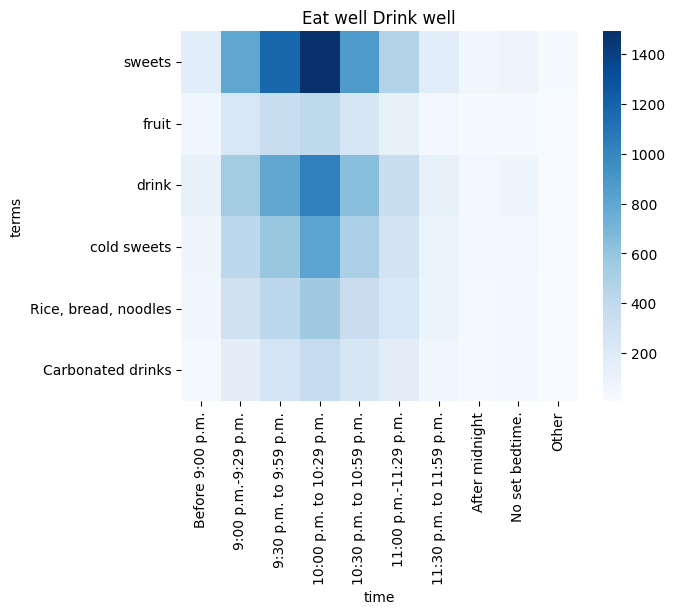

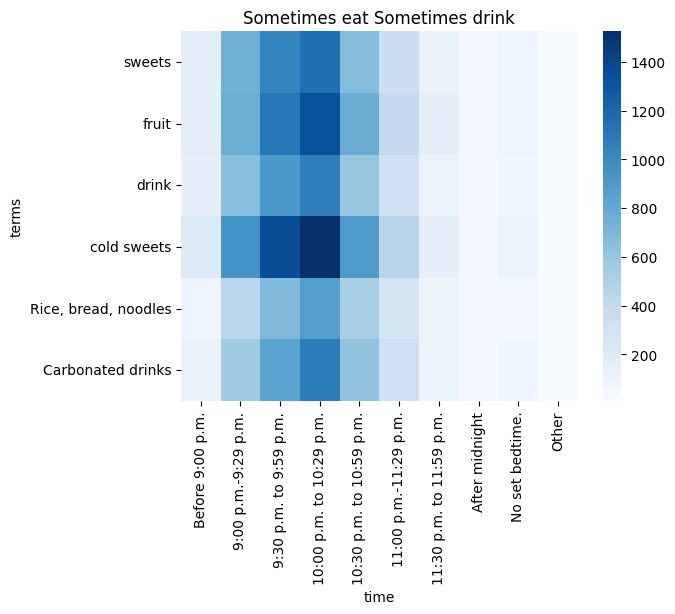

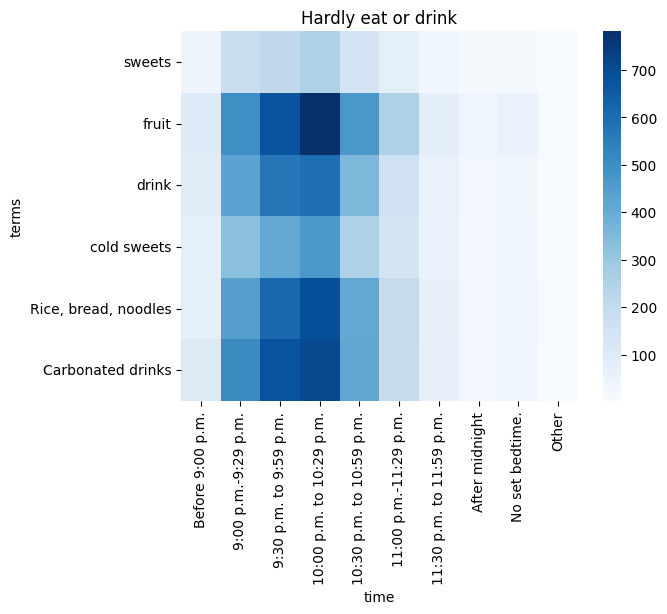

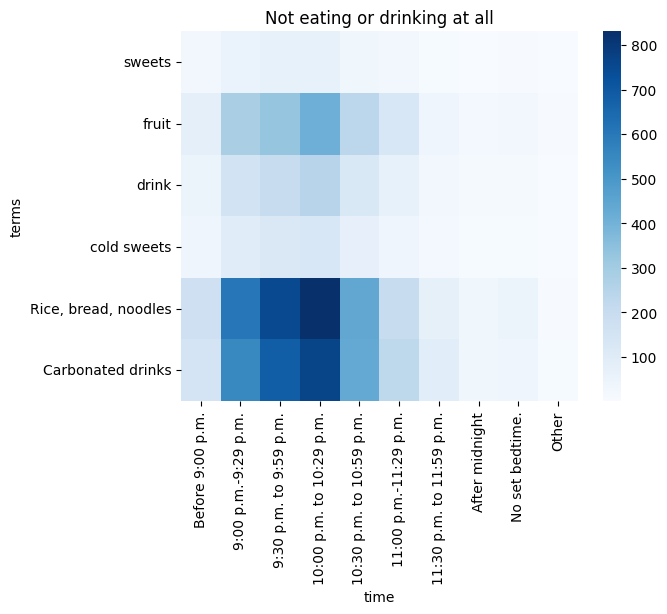

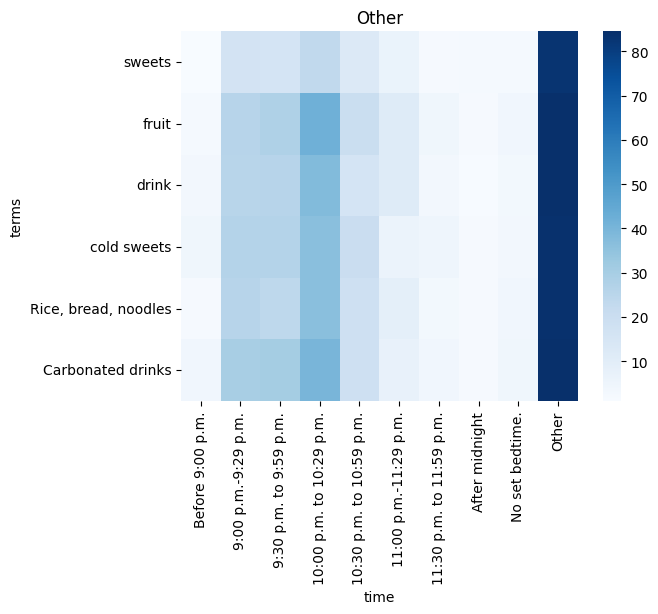

<Figure size 640x480 with 0 Axes>

In [7]:
columns = ['Eat well Drink well','Sometimes eat Sometimes drink','Hardly eat or drink','Not eating or drinking at all','Other']
for i in columns:
    flights = pd.pivot_table(df, index='terms', columns='time', values=i)
    df_list = []
    df_flights = pd.DataFrame(flights)
    df_list.append(df_flights)   
    
    for df_c in df_list:
        df_c = df_c.sort_index(axis=0, ascending=False, inplace=False)
        df_c = df_c.loc[:, ['Before 9:00 p.m.', '9:00 p.m.-9:29 p.m.', '9:30 p.m. to 9:59 p.m.','10:00 p.m. to 10:29 p.m.','10:30 p.m. to 10:59 p.m.','11:00 p.m.-11:29 p.m.','11:30 p.m. to 11:59 p.m.','After midnight','No set bedtime.','Other']]
        ax = sns.heatmap(df_c,cmap='Blues')

        ax.set_title(i)
        plt.figure()


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/XNRWVtpC/publicdomainq-0062147.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> -ber-</p>

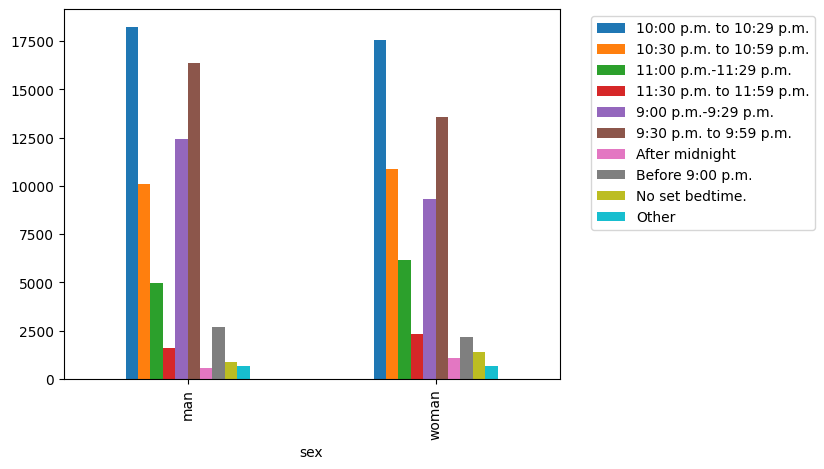

In [8]:
ber_df = pd.pivot_table(df, index='sex', columns='time', values='total', aggfunc=np.sum)
ber_df.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()